In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import numpy as np

In [2]:
import seaborn as sns

In [5]:
titanic_data=pd.read_csv('../datasets/titanic.csv')

In [6]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

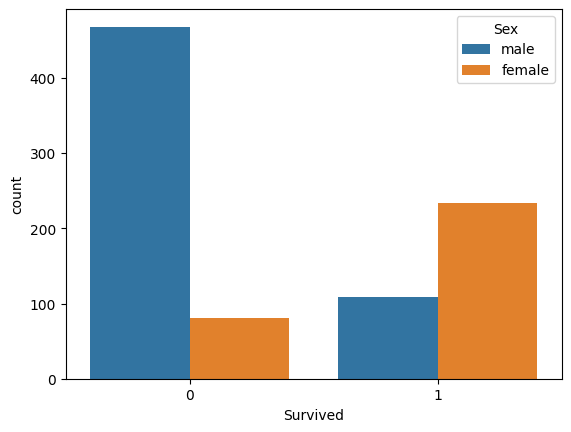

In [9]:
sns.countplot(data=titanic_data,x='Survived',hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

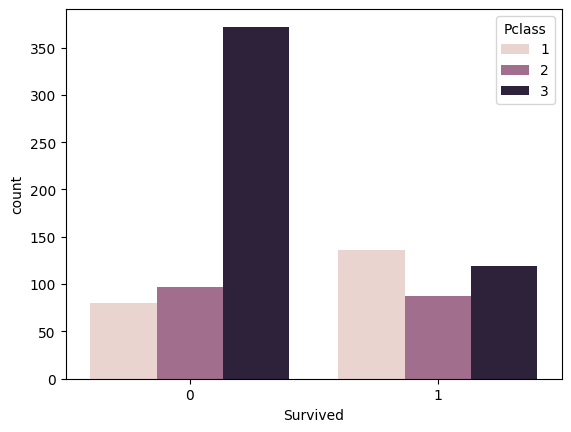

In [10]:
sns.countplot(data=titanic_data,x='Survived',hue='Pclass')

In [12]:
mean_ages=titanic_data.groupby('Pclass')['Age'].mean()

In [13]:
mean_ages

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Pclass']]
    else:
        return row['Age']

In [16]:
titanic_data['Age']=titanic_data.apply(fill_age,axis=1)

In [18]:
titanic_data.drop(columns=['Cabin'],inplace=True)

In [19]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [20]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
titanic_data=titanic_data.dropna()

In [22]:
embarked_data=pd.get_dummies(titanic_data['Embarked']).astype(int)

In [25]:
sex_data=pd.get_dummies(titanic_data['Sex']).astype(int)

In [27]:
titanic_data=pd.concat([titanic_data,sex_data,embarked_data],axis=1)

In [28]:
titanic_data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  22.00000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000   
2                               Heikkinen, Miss. Laina  female  26.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000   
4                             Allen, Mr. William Henry    male  35.00000   
..                                                 ...     ...       ...   
886                              Montvila, Rev. Juozas    male  27.00000   
887                       Graham, Miss. Margaret Edith  female  19.00000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  25.14062   
889                              Behr, Mr. Karl Howell    male  26.00000   
890                                Dooley, Mr. Patrick    male  32.00000   

     SibSp  Parch            Ticket     Fare Embarked  female  male  C  Q  S  
0        1      0         A/5 21171   7.2500        S       0     1  0  0  1  
1        1      0          PC 17599  71.2833        C       1     0  1  0  0  
2        0      0  STON/O2. 3101282   7.9250        S       1     0  0  0  1  
3        1      0            113803  53.1000        S       1     0  0  0  1  
4        0      0            373450   8.0500        S       0     1  0  0  1  
..     ...    ...               ...      ...      ...     ...   ... .. .. ..  
886      0      0            211536  13.0000        S       0     1  0  0  1  
887      0      0            112053  30.0000        S       1     0  0  0  1  
888      1      2        W./C. 6607  23.4500        S       1     0  0  0  1  
889      0      0            111369  30.0000        C       0     1  1  0  0  
890      0      0            370376   7.7500        Q       0     1  0  1  0  

[891 rows x 16 columns]

In [29]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'female', 'male', 'C', 'Q', 'S'],
      dtype='object')

In [30]:
titanic_data.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'],axis=1,inplace=True)

In [31]:
titanic_data

Survived  Pclass       Age  SibSp  Parch     Fare  female  male  C  Q  S
0           0       3  22.00000      1      0   7.2500       0     1  0  0  1
1           1       1  38.00000      1      0  71.2833       1     0  1  0  0
2           1       3  26.00000      0      0   7.9250       1     0  0  0  1
3           1       1  35.00000      1      0  53.1000       1     0  0  0  1
4           0       3  35.00000      0      0   8.0500       0     1  0  0  1
..        ...     ...       ...    ...    ...      ...     ...   ... .. .. ..
886         0       2  27.00000      0      0  13.0000       0     1  0  0  1
887         1       1  19.00000      0      0  30.0000       1     0  0  0  1
888         0       3  25.14062      1      2  23.4500       1     0  0  0  1
889         1       1  26.00000      0      0  30.0000       0     1  1  0  0
890         0       3  32.00000      0      0   7.7500       0     1  0  1  0

[891 rows x 11 columns]

In [33]:
titanic_data['Age']=titanic_data['Age'].apply(lambda x:int(x))

In [34]:
titanic_data

Survived  Pclass  Age  SibSp  Parch     Fare  female  male  C  Q  S
0           0       3   22      1      0   7.2500       0     1  0  0  1
1           1       1   38      1      0  71.2833       1     0  1  0  0
2           1       3   26      0      0   7.9250       1     0  0  0  1
3           1       1   35      1      0  53.1000       1     0  0  0  1
4           0       3   35      0      0   8.0500       0     1  0  0  1
..        ...     ...  ...    ...    ...      ...     ...   ... .. .. ..
886         0       2   27      0      0  13.0000       0     1  0  0  1
887         1       1   19      0      0  30.0000       1     0  0  0  1
888         0       3   25      1      2  23.4500       1     0  0  0  1
889         1       1   26      0      0  30.0000       0     1  1  0  0
890         0       3   32      0      0   7.7500       0     1  0  1  0

[891 rows x 11 columns]

In [50]:
x=titanic_data.drop(['Survived'],axis=1)

In [51]:
y=titanic_data['Survived']

In [52]:
x.head()


Pclass  Age  SibSp  Parch     Fare  female  male  C  Q  S
0       3   22      1      0   7.2500       0     1  0  0  1
1       1   38      1      0  71.2833       1     0  1  0  0
2       3   26      0      0   7.9250       1     0  0  0  1
3       1   35      1      0  53.1000       1     0  0  0  1
4       3   35      0      0   8.0500       0     1  0  0  1

In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [54]:
model=LogisticRegression(max_iter=1000)

In [55]:
model.fit(xtrain,ytrain,)

LogisticRegression(max_iter=1000)

In [56]:
y_pred=model.predict(xtest)

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       157
           1       0.81      0.73      0.77       111

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268

confusion matrix: 



<Figure size 1500x700 with 0 Axes>

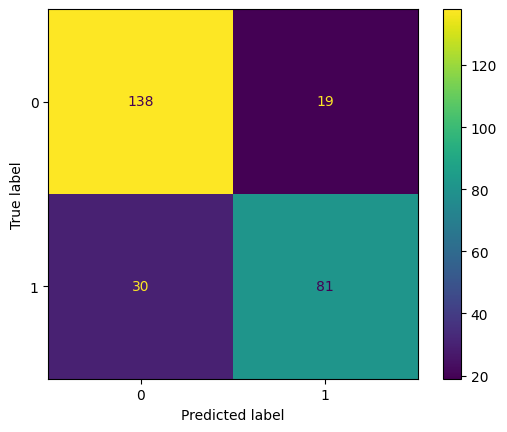

In [59]:
print(f'Classification Report: \n{classification_report(ytest,y_pred)}')
print(f'confusion matrix: \n')
plt.figure(figsize=(15,7))
cm=confusion_matrix(ytest,y_pred,labels=model.classes_)
cmd=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
cmd.plot(colorbar=True)
plt.show()

In [58]:
import joblib
joblib.dump(model,'titanic_logistic_regression.pkl')


['titanic_logistic_regression.pkl']